<a href="https://colab.research.google.com/github/chrjohnson26/Network-Science/blob/main/pset7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

(A) Write a function random walk(G, n steps, i) which simulates n steps timesteps of a simple random walk on a graph G, starting at node i. This function should return a list or array containing the labels of the nodes visited by the walk. For example: \\
W = random_walk(G, n_steps, i) \\
W[t]             # location of walk at time t

In [ ]:
'''
    random_walk simulates n_steps of a simple random walk on graph G
    Args:
      Graph, G
      starting node, i
      number of random steps, (int) n_steps

    Returns:
      list: A list containing the nodes visited during the walk
'''
def random_walk(G, n_steps, i):
  A = nx.to_numpy_array(G) # deriving the adjacency matrix of G

  W = [i] # Adding start node to the walk array
  current_node = i
  for _ in range(n_steps-1):
    neighbors = list(nx.neighbors(G, current_node)) # generate a list of possible next steps from neighbors of current_node
    next_node = np.random.choice(neighbors) # randomly choose a node from the neighbors of current_node
    W.append(next_node) # adding node to the walk array
    current_node = next_node # updating the current node
  return W

B) Access any small-ish connected graph (no more than 1,000 nodes), and use your function to simulate a random walk on this graph for at least $10^5$ timesteps.

In [ ]:
# Generating graph
n = 550     # 550 nodes
c = 10       # average degree 5
p = c/n     # probability of generating an edge between two nodes
G = nx.erdos_renyi_graph(n, p)

# Ensure the graph is connected
if not nx.is_connected(G):
    G = G.subgraph(max(nx.connected_components(G), key=len)).copy()
    n = len(nx.nodes(G))

# Simulating random walk for graph G for $10^5$ timesteps
n_steps = 10**5
start_node = 0    # starting at the 0th node
walk_list = random_walk(G, n_steps, start_node)

550


C) Create a scatterplot: \\
• Each point corresponds to a node i. \\
• The horizontal coordinate is $\pi_i$. \\
• The vertical coordinate is the fraction of time that the random walk spent on node i. \\
Also plot the line of equality y = x. Of course, we are expecting to find that the points
on the scatterplot are close to the line of equality. Please make sure that your plot is
carefully labeled.

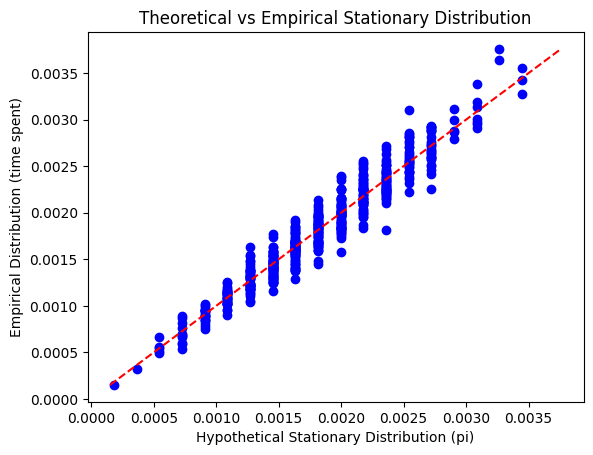

In [ ]:
# x-coordinate
degrees = nx.degree(G) # vector of node degrees
degrees = sorted(degrees, key=lambda degree: degree[0])
degrees = [deg for node, deg in degrees]
m = np.sum(degrees)/2  # number of edges is the sum of the degrees divided by 2
pi = [degree/(2*m) for degree in degrees]

# y-coordinate
time_spent = np.zeros(n)
for node in walk_list:
  time_spent[node] += 1/n_steps

# Plotting time_spent over pi
plt.scatter(pi, time_spent, c= 'blue')
plt.xlabel("Hypothetical Stationary Distribution (pi)")
plt.ylabel("Empirical Distribution (time spent)")
plt.title("Theoretical vs Empirical Stationary Distribution")

# Overlay x = y line
min_val = min(min(pi), min(time_spent))
max_val = max(max(pi), max(time_spent))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="x = y")